In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [114]:
data=pd.read_csv("pricing.csv")
data

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422
...,...,...,...,...,...,...,...,...,...,...
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048


In [115]:
data.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [116]:
fig=px.scatter(data,x="Expected_Ride_Duration",y="Historical_Cost_of_Ride",trendline="ols",title="Cost of ride vs duration.")
fig.update_layout(width=1000,height=800)

fig.write_image("Cost of ride vs duration.png")

fig.show()
# Rides with higher ride duration tend to cost more

In [117]:
fig=px.box(data,x="Vehicle_Type",y="Historical_Cost_of_Ride",title="Ride cost vs car type.")
fig.update_layout(width=1000,height=800)

fig.write_image("Ride cost vs car type.png")

fig.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3744\2756422285.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



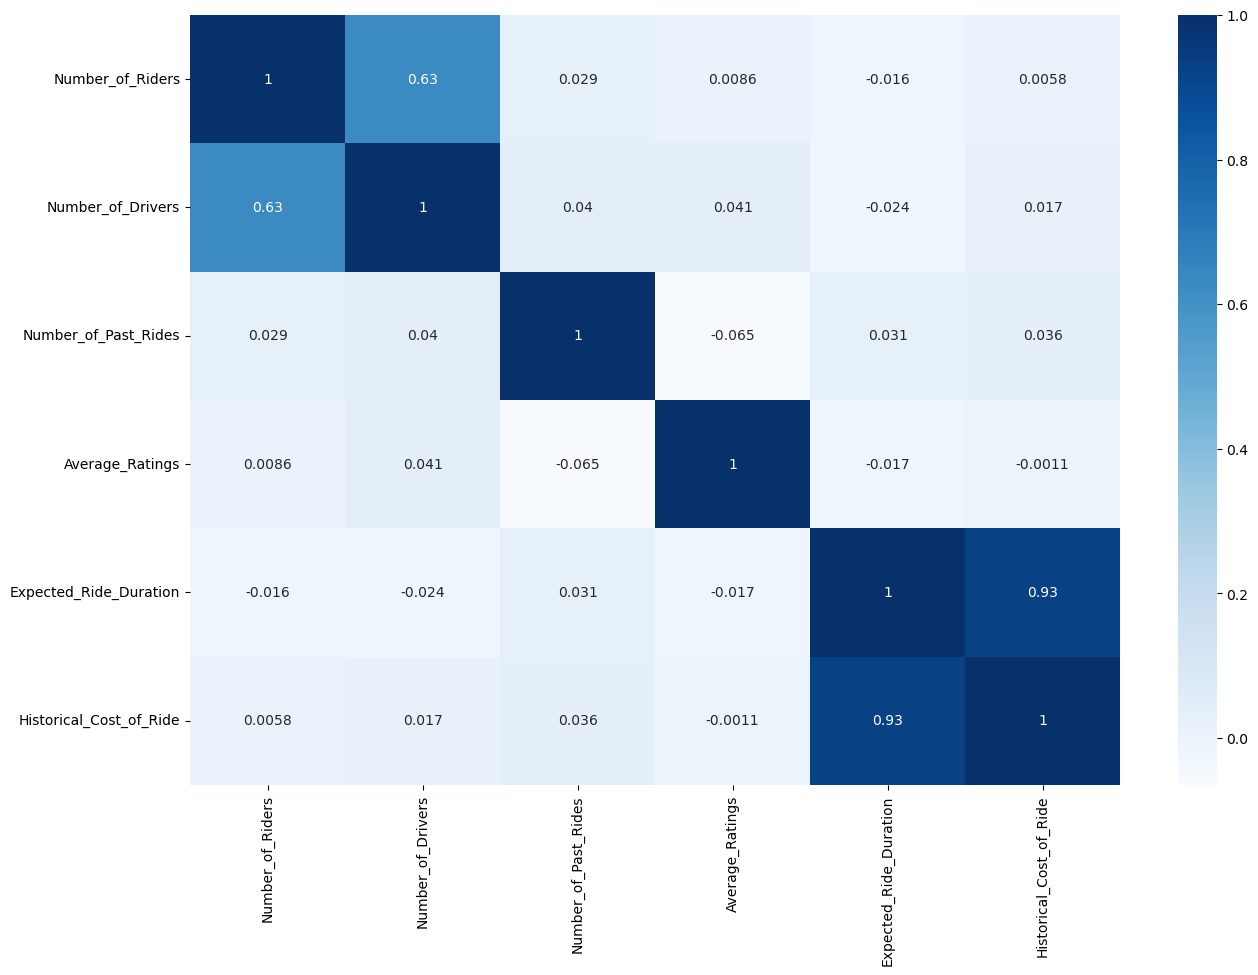

In [118]:
plt.figure(figsize=(15,10))

sns.heatmap(data.corr(),annot=True,cmap="Blues")

plt.savefig("Correlation matrix.")

In [119]:
# Implementing the dynamic pricing strategy to adjust ride cost dynamically based on demmand and supply levels.

In [120]:
high_demand_percentile=75
low_demand_percentile=25

# Demand multiplier.
data["demand_multiplier"]=np.where(data["Number_of_Riders"] > np.percentile(data["Number_of_Riders"],high_demand_percentile),
                                   data["Number_of_Riders"] / np.percentile(data["Number_of_Riders"],high_demand_percentile),
                                   data["Number_of_Riders"] / np.percentile(data["Number_of_Riders"],low_demand_percentile))



# Supply multiplier.
high_supply_percentile=75
low_supply_percentile=25
data["supply_multiplier"]=np.where(data["Number_of_Drivers"] > np.percentile(data["Number_of_Drivers"],low_supply_percentile),
                                   np.percentile(data["Number_of_Drivers"],high_supply_percentile) / data["Number_of_Drivers"],
                                   np.percentile(data["Number_of_Drivers"],low_supply_percentile) /data["Number_of_Drivers"])


#Defining price adjusment factors for high and low demand and supply.
demand_threshold_high= 1.2
demand_threshold_low=0.8
supply_threshold_high=0.8
supply_threshold_low=1.2

# Calculating adjusted ride cost for dynamic pricing.
data["adjusted_ride_cost"]=data["Historical_Cost_of_Ride"] *(np.maximum(data["demand_multiplier"],demand_threshold_low)
                                                             *np.maximum(data["supply_multiplier"],supply_threshold_high))

In [121]:
# Percentage profit.
data["profit_percentage"]=((data["adjusted_ride_cost"]-data["Historical_Cost_of_Ride"])/data["Historical_Cost_of_Ride"]) * 100

# Trying to identify profitable rides.

profitable_rides=data[data["profit_percentage"] > 0]
loss_rides=data[data["profit_percentage"]<0 ]


In [122]:
profitable_count=len(profitable_rides)
loss_count=len(loss_rides)

In [123]:
profitable_count

826

In [124]:
loss_count

173

In [125]:
labels = ["profitable_rides", "loss_rides"]
values = [profitable_count, loss_count]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3)])
fig.update_layout(
    title="Ride profitability (Dynamic vs historical)",
    autosize=False,
    width=800,  
    height=600  
)
fig.write_image("Ride profitability (Dynamic vs historical).png")
fig.show()

In [126]:
fig=px.scatter(data,x="Expected_Ride_Duration",y="adjusted_ride_cost",trendline="ols",title="Adjusted cost vs ride duration.")
fig.update_layout(height=800,width=1000)

fig.write_image("Adjusted cost vs time.png")

fig.show()

In [127]:
def data_pipeline(data):
    numeric_features=data.select_dtypes(include=["float","int"]).columns
    categorical_features=data.select.dtypes(include=["object"]).columns
    data[numeric_features]=data[numeric_features].fillna(data[numeric_features].mean())
    for feature in numeric_features:
        Q1=data[feature].quantile(0.25)
        Q3=data[feature].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-(1.5 * IQR)
        upper_bound=Q3-(1.5 * IQR)

        data[feature]=np.where((data[feature] < lower_bound) | (data[feature] > upper_bound),
                               data([feature].mean(),data[feature]))
        
        data[categorical_features]=data[categorical_features].fillna(data[categorical_features].mode().iloc[0])

In [128]:
data["Vehicle_Type"]=data["Vehicle_Type"].map({"Premium":1,"Economy":0})

In [129]:
x = np.array(data[["Number_of_Riders", "Number_of_Drivers", "Vehicle_Type", "Expected_Ride_Duration"]])
y = np.array(data[["adjusted_ride_cost"]])

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

y_train = y_train.ravel()
y_test = y_test.ravel()

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)



RandomForestRegressor()

In [130]:
def get_vehicle_type_numeric(vehicle_type):
    vehicle_type_mapping = {
        "Premium": 1,
        "Economy": 0
    }
    vehicle_type_numeric = vehicle_type_mapping.get(vehicle_type)
    return vehicle_type_numeric
  

In [131]:
def predict_price(number_of_riders, number_of_drivers, vehicle_type, Expected_Ride_Duration):
    vehicle_type_numeric = get_vehicle_type_numeric(vehicle_type)
    if vehicle_type_numeric is None:
        raise ValueError("Invalid vehicle type")
    
    input_data = np.array([[number_of_riders, number_of_drivers, vehicle_type_numeric, Expected_Ride_Duration]])
    predicted_price = model.predict(input_data)
    return predicted_price

# Example prediction using user input values
user_number_of_riders = 50
user_number_of_drivers = 25
user_vehicle_type = "Economy"
Expected_Ride_Duration = 30
predicted_price = predict_price(user_number_of_riders, user_number_of_drivers, user_vehicle_type, Expected_Ride_Duration)
print("Predicted price:", predicted_price)

Predicted price: [249.86987842]


In [132]:
y_pred = model.predict(x_test)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=y_test.flatten(),
    y=y_pred,
    mode='markers',
    name='Actual vs Predicted'
))

fig.add_trace(go.Scatter(
    x=[min(y_test.flatten()), max(y_test.flatten())],
    y=[min(y_test.flatten()), max(y_test.flatten())],
    mode='lines',
    name='Ideal',
    line=dict(color='red', dash='dash')
))

fig.update_layout(
    title='Actual vs Predicted Values',
    xaxis_title='Actual Values',
    yaxis_title='Predicted Values',
    showlegend=True,
    width=1000,height=800,
)
fig.write_image("Actuals vs predictions.png")
fig.show()